# Performing EDA on Covid-19 Dataset

## Internship Task 3 – Q/A regarding Data Visualization

**Name:** Abid Ali  
**Company:** Code Sentinel  

## 🧰 Importing Required Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Cleaned_COVID_Data.csv")

## 🔥 Heatmap for Visualizing Correlation

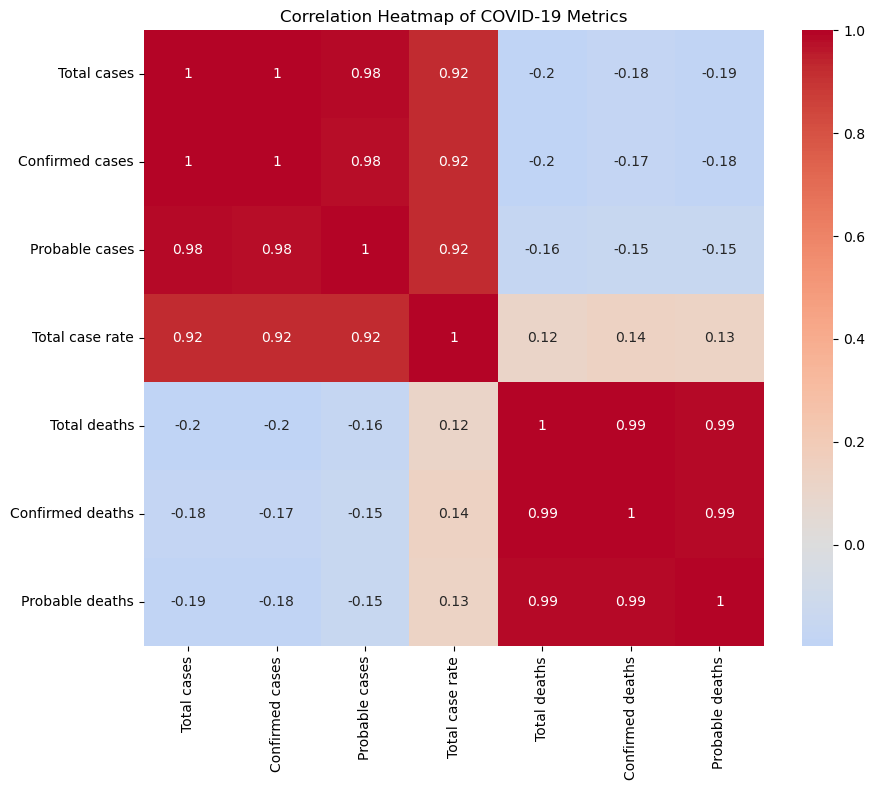

In [3]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.show()

## 📈 Data Visualization with Matplotlib and Seaborn

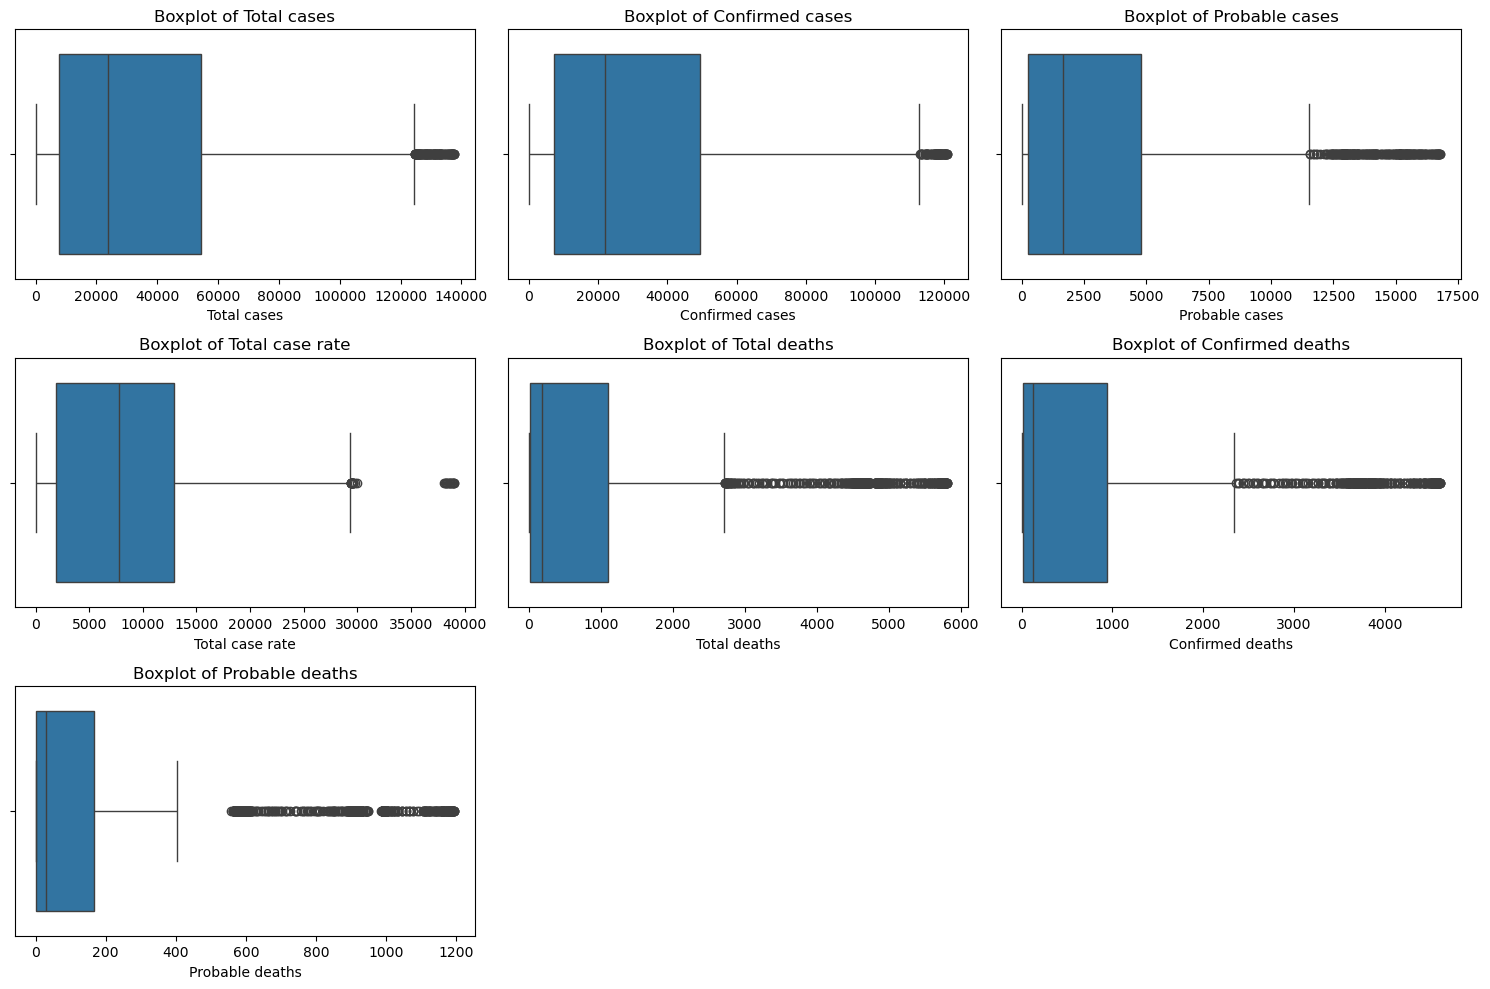

In [4]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for each numeric column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  # Adjust layout if you have more/fewer columns
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

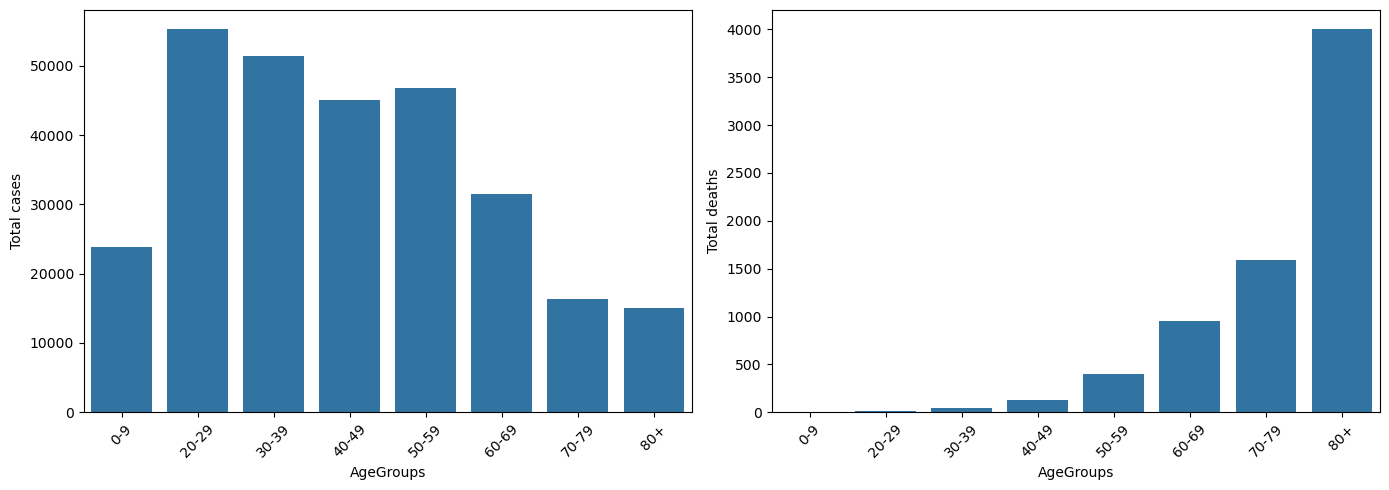

In [5]:
age_stats = df.groupby('AgeGroups', observed=True).agg({
    'Total cases': 'mean',
    'Total deaths': 'mean'
}).reset_index()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(data=age_stats, x='AgeGroups', y='Total cases', ax=axes[0])
sns.barplot(data=age_stats, x='AgeGroups', y='Total deaths', ax=axes[1])

# Set rotation for x-axis labels
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

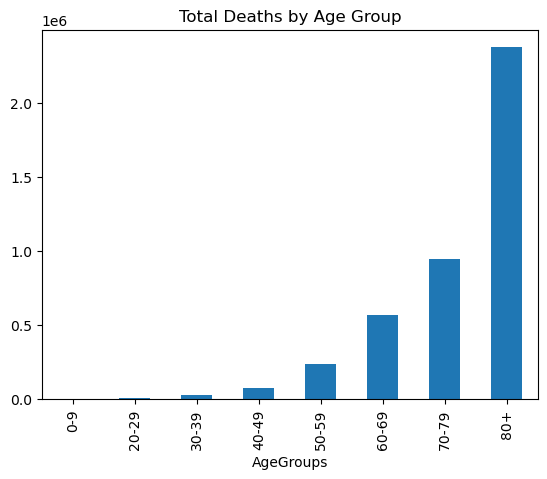

In [6]:
df.groupby('AgeGroups', observed=True)['Total deaths'].sum().plot(kind='bar')
plt.title('Total Deaths by Age Group')
plt.show()

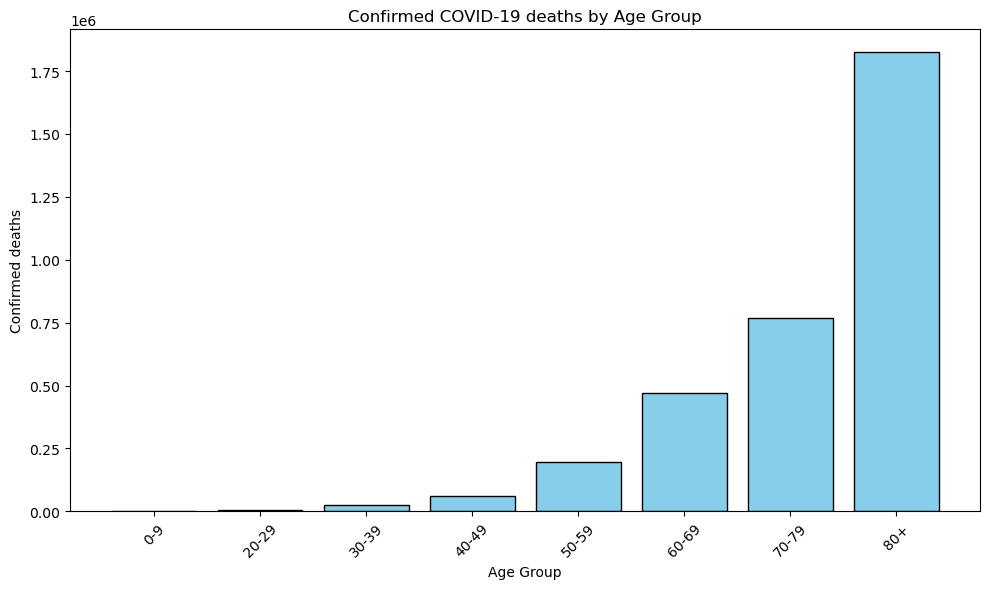

In [7]:
# Aggregate total cases by age group
cases_by_age = df.groupby('AgeGroups', observed=True)['Confirmed deaths'].sum().sort_index()

# Plot histogram (bar chart) of total cases by age group
plt.figure(figsize=(10,6))
plt.bar(cases_by_age.index, cases_by_age.values, color='skyblue', edgecolor='black')
plt.title('Confirmed COVID-19 deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Confirmed deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

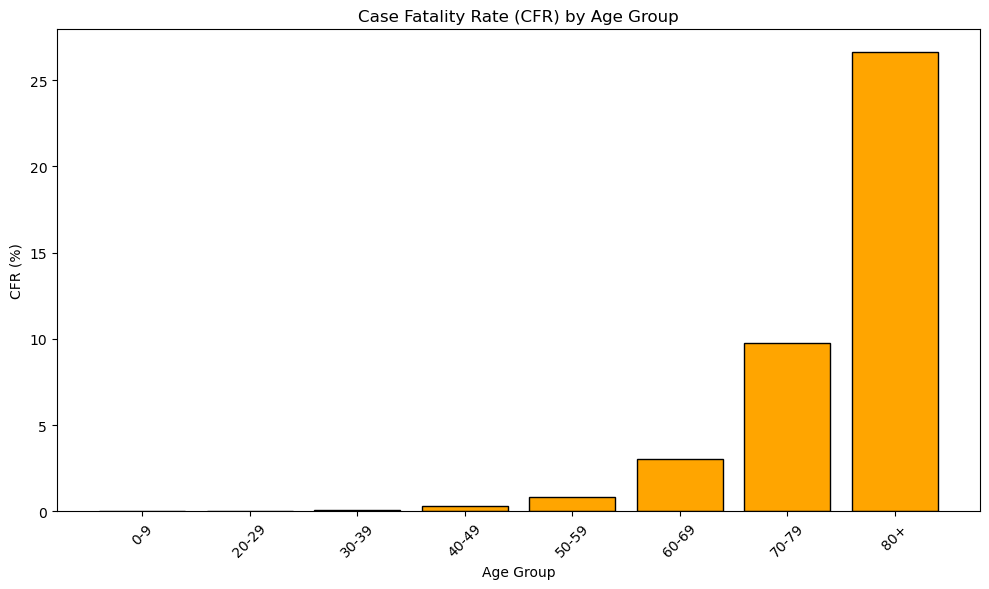

In [8]:
# Calculate CFR by age group (aggregated over all time)
deaths = df.groupby('AgeGroups', observed=True)['Total deaths'].sum()
cases = df.groupby('AgeGroups', observed=True)['Total cases'].sum()
cfr_by_age = deaths / cases

plt.figure(figsize=(10,6))
plt.bar(cfr_by_age.index, cfr_by_age.values*100, color='orange', edgecolor='black')
plt.title('Case Fatality Rate (CFR) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('CFR (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📉 Histogram  

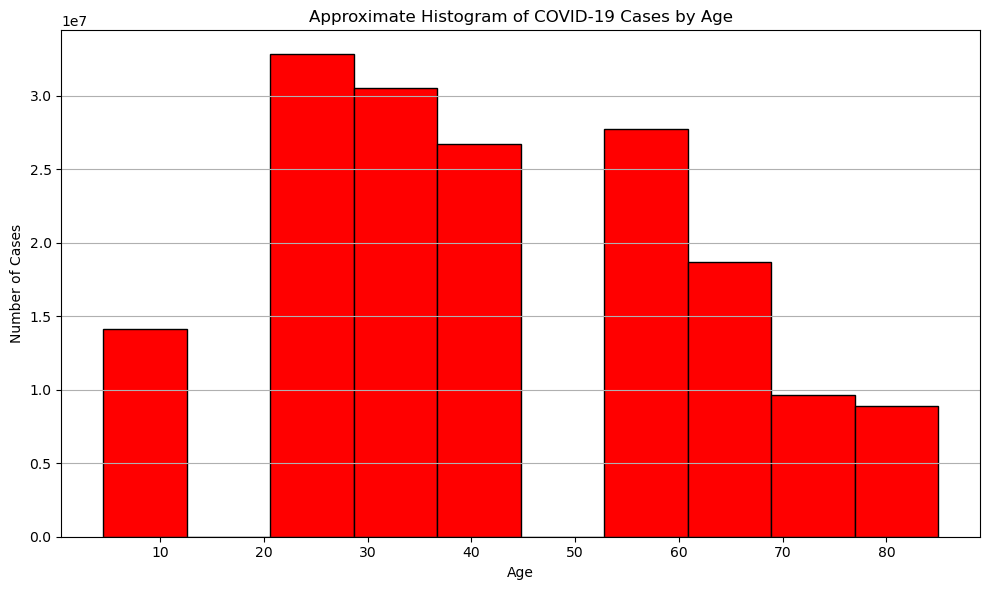

In [9]:
def get_age_midpoint(age_group):
    try:
        if '+' in age_group:
            return int(age_group.replace('+', '')) + 5
        lower, upper = map(int, age_group.split('-'))
        return (lower + upper) / 2
    except:
        return None

# Add midpoint column to the DataFrame
df['AgeMidpoint'] = df['AgeGroups'].apply(get_age_midpoint)

# Drop rows with missing midpoint values
df_clean = df.dropna(subset=['AgeMidpoint'])

# Prepare data for histogram (repeating midpoint by number of cases)
ages = df_clean['AgeMidpoint'].repeat(df_clean['Total cases'].astype(int))

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=10, color='red', edgecolor='black')
plt.title('Approximate Histogram of COVID-19 Cases by Age')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 📊 Top 5 Most Frequent Values

In [10]:
# Select only important columns
selected_cols = ["AgeGroups", "Total deaths", "Total cases"]

# Get top 5 frequent values for each selected column
top_frequent = {}
for col in selected_cols:
    top_frequent[col] = df[col].value_counts().head(5)
    
# Convert results into a DataFrame
result = []
for col, values in top_frequent.items():
    for val, count in values.items():
        result.append([col, val, count])

freq_df = pd.DataFrame(result, columns=["Column", "Value", "Count"])
print(freq_df)

          Column  Value  Count
0      AgeGroups    0-9    593
1      AgeGroups  20-29    593
2      AgeGroups  30-39    593
3      AgeGroups  40-49    593
4      AgeGroups  50-59    593
5   Total deaths      1    449
6   Total deaths      4    161
7   Total deaths      2    140
8   Total deaths     21    100
9   Total deaths     10     84
10   Total cases   6971      3
11   Total cases   7221      3
12   Total cases   8502      3
13   Total cases  16558      3
14   Total cases    634      3


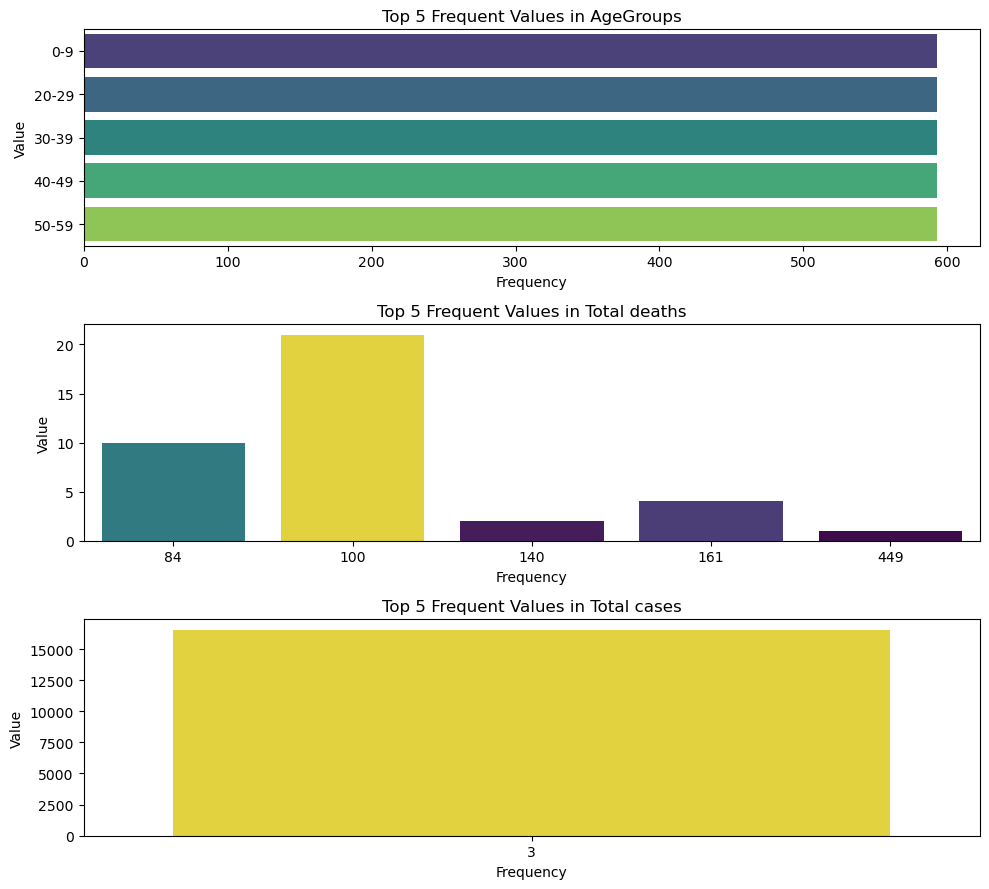

In [11]:
# Visualization
num_cols = len(selected_cols)
fig, axes = plt.subplots(num_cols, 1, figsize=(10, num_cols * 3))

for i, col in enumerate(selected_cols):
    subset = freq_df[freq_df["Column"] == col]
    sns.barplot(
        x="Count", y="Value",
        data=subset,
        ax=axes[i],
        hue="Value",       
        dodge=False,
        legend=False,      
        palette="viridis"
    )
    axes[i].set_title(f"Top 5 Frequent Values in {col}")
    axes[i].set_xlabel("Frequency")
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()